In [12]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [13]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [14]:
import zipfile

In [15]:
import shutil

zip_file = '/content/test1.zip'
extract_path = 'test'

shutil.unpack_archive(zip_file, extract_path)


In [16]:
import shutil

zip_file = '/content/train.zip'
extract_path = 'train'

shutil.unpack_archive(zip_file, extract_path)


In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 37500 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


Found 37500 images belonging to 2 classes.


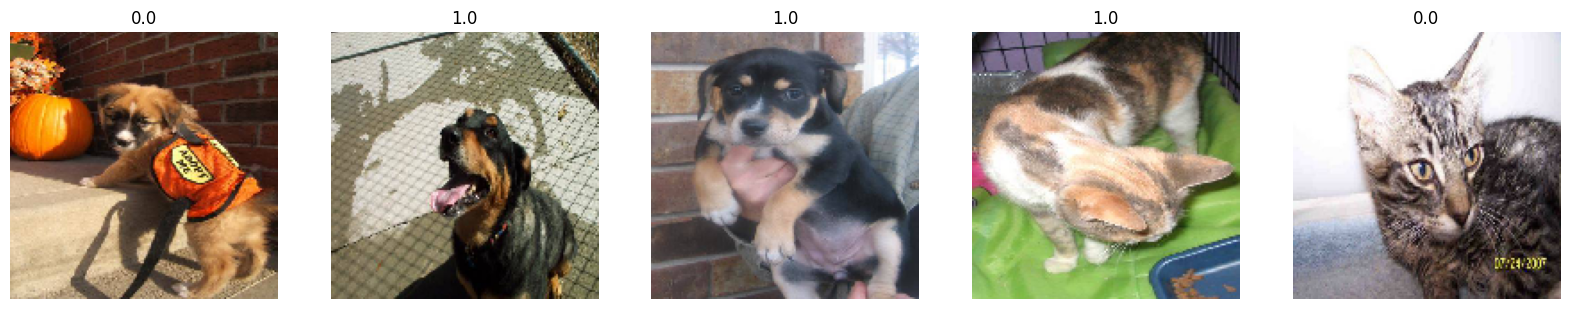

In [ ]:
import matplotlib.pyplot as plt

# Generate a batch of training data
train_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'train',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Get the first batch
images, labels = next(train_data_gen)

# Plot the sample training images
fig, axes = plt.subplots(1, 5, figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0, 5):
    axes[i].imshow(images[i])
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
validation_generator = test_data_gen.flow_from_directory(
    directory='test',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 12500 images belonging to 1 classes.


In [ ]:
train_steps = train_data_gen.n // train_data_gen.batch_size
val_steps = np.ceil(validation_generator.samples / BATCH_SIZE)
EPOCHS = 10




history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=val_steps
)


<ipython-input-32-4a1e7fda2e95>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
375/375 [==============================] - 104s 239ms/step - loss: 0.6419 - accuracy: 0.6647 - val_loss: 1.0954 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 88s 236ms/step - loss: 0.6364 - accuracy: 0.6685 - val_loss: 1.0659 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 86s 230ms/step - loss: 0.6439 - accuracy: 0.6563 - val_loss: 1.0397 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 128s 341ms/step - loss: 0.6406 - accuracy: 0.6619 - val_loss: 1.1358 - val_accuracy: 0.0000e+00
Epoch 5/10
375/375 [==============================] - 84s 224ms/step - loss: 0.6398 - accuracy: 0.6634 - val_loss: 1.1495 - val_accuracy: 0.0000e+00
Epoch 6/10
375/375 [==============================] - 85s 226ms/step - loss: 0.6367 - accuracy: 0.6676 - val_loss: 1.0766 - val_accuracy: 0.0000e+00
Epoch 7/10
375/375 [==============================] - 86s 228ms/step - loss: 0.6361 - accuracy: 0.6679 -

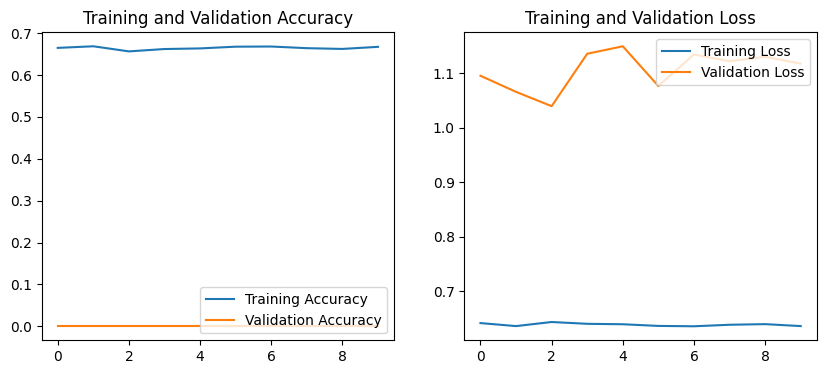

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


In [ ]:
#### Hyperparameter tuning for better accuracy

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 5.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


<ipython-input-61-eeffcd97681f>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Reduce the learning rate to avoid overshooting the optimal weights
opt = tf.keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
# Use binary cross-entropy loss for binary classification problem
model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
#model1.compile(optimizer='adam',
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])


In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
# Increase the number of epochs to allow the model to learn more
EPOCHS = 30

history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/30
1171/1171 [==============================] - 167s 140ms/step - loss: 0.6906 - accuracy: 0.6273 - val_loss: 1.1216 - val_accuracy: 2.4000e-04
Epoch 2/30
1171/1171 [==============================] - 166s 142ms/step - loss: 0.6479 - accuracy: 0.6589 - val_loss: 1.1162 - val_accuracy: 1.6000e-04
Epoch 3/30
1171/1171 [==============================] - 170s 145ms/step - loss: 0.6472 - accuracy: 0.6619 - val_loss: 1.1195 - val_accuracy: 0.0000e+00
Epoch 4/30
1171/1171 [==============================] - 168s 144ms/step - loss: 0.6452 - accuracy: 0.6636 - val_loss: 1.0107 - val_accuracy: 0.0054
Epoch 5/30
1171/1171 [==============================] - 166s 142ms/step - loss: 0.6442 - accuracy: 0.6633 - val_loss: 1.1027 - val_accuracy: 0.0000e+00
Epoch 6/30
1171/1171 [==============================] - 170s 145ms/step - loss: 0.6452 - accuracy: 0.6646 - val_loss: 1.0918 - val_accuracy: 0.0000e+00
Epoch 7/30
1171/1171 [==============================] - 166s 142ms/step - loss: 0.6440 - acc

In [ ]:
# Now we evaluate using Vision Transformer (ViT) instead of CNN, and check the accuracy

In [17]:
!pip install vit-keras
!pip install tensorflow-addons

from vit_keras import vit, utils
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
image_size = 256
img_size=[256,256]
base_model = vit.vit_b16(
    image_size=image_size,
    activation='relu',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
)

In [19]:
print(base_model.summary())

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape_1 (Reshape)         (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [20]:
for layer in base_model.layers:
    layer.trainable=False

print("Base model layers are freezed!!!")

Base model layers are freezed!!!


In [21]:
print(base_model.summary())

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape_1 (Reshape)         (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [22]:
x = Dropout(0.2)(base_model.output)
x = Flatten()(x)
x = Dense(2,'softmax')(x)

model = Model(inputs=base_model.input,outputs=x)
print("Final Model is:\n",model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape_1 (Reshape)         (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [23]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)


In [24]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [25]:
RANDOM_SEED=123
train_datagen = ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    rescale=1.0/255,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
)


train_generator = train_datagen.flow_from_directory(
    'train',
    color_mode='rgb',
    target_size= img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    'test',
    color_mode='rgb',
    target_size= img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)




Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [26]:
import time
start = time.time()
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data = validation_generator
)

end = time.time()
print("Total time taken: ",end-start)

Epoch 1/10
391/391 [==============================] - 824s 2s/step - loss: 2.1775 - accuracy: 0.8116 - val_loss: 2.0582 - val_accuracy: 0.9078
Epoch 2/10
391/391 [==============================] - 795s 2s/step - loss: 2.0841 - accuracy: 0.8119 - val_loss: 2.0084 - val_accuracy: 0.9065
Epoch 3/10
391/391 [==============================] - 845s 2s/step - loss: 2.0717 - accuracy: 0.8112 - val_loss: 1.9390 - val_accuracy: 0.8890
Epoch 4/10
391/391 [==============================] - 790s 2s/step - loss: 2.0603 - accuracy: 0.8084 - val_loss: 1.9333 - val_accuracy: 0.8937
Epoch 5/10
391/391 [==============================] - 832s 2s/step - loss: 2.0570 - accuracy: 0.8060 - val_loss: 1.9160 - val_accuracy: 0.8879
Epoch 6/10
391/391 [==============================] - 834s 2s/step - loss: 2.0550 - accuracy: 0.8010 - val_loss: 1.9633 - val_accuracy: 0.9039
Epoch 7/10
391/391 [==============================] - 834s 2s/step - loss: 2.0528 - accuracy: 0.7992 - val_loss: 1.8560 - val_accuracy: 0.8717

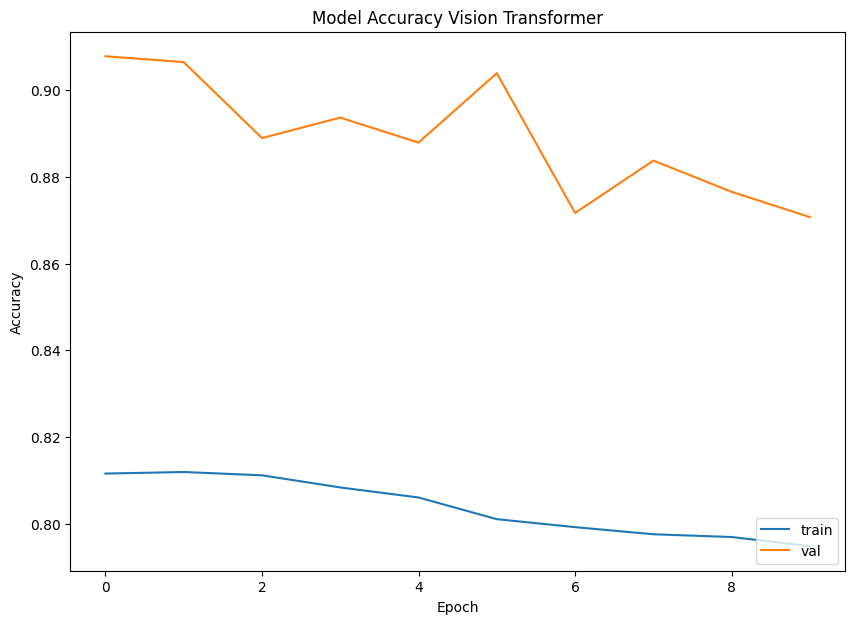

In [27]:
# plotting the figure for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy Vision Transformer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


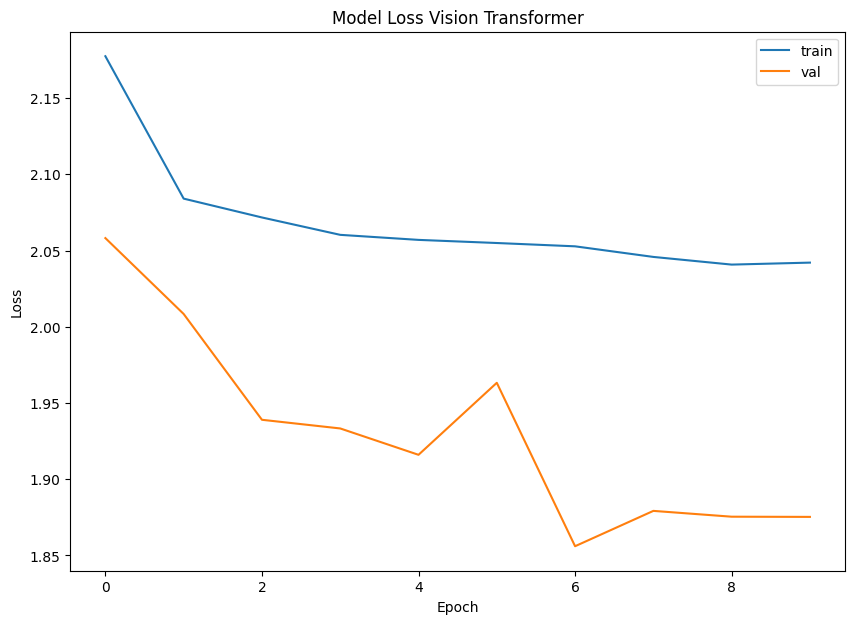

In [28]:
# plotting the figure for loss
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Vision Transformer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()